In [71]:
# 先导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 获取数据

In [72]:
# 从本地读取数据
data = pd.read_csv("./data/otto/train.csv")
print(data.shape)

(61878, 95)


In [73]:
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [74]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


C:\Users\ZSJ\AppData\Local\Temp\ipykernel_26496\1490860860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.target, palette='Set2')


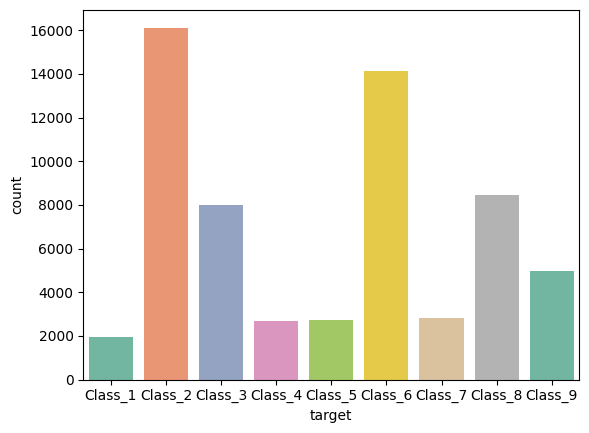

In [75]:
# 进行数据的 图形可视化，查看数据分布
# !pip install seaborn

# seaborn是基于matplotlib构建的高级数据可视化库，提供了更加简洁和美观的图形绘制接口。
import seaborn as sns

# countplot 用于绘制类别型数据的条形图。条形图展示了每个类别的数据点数量，便于观察类别分布是否均衡。
sns.countplot(x=data.target, palette='Set2')

plt.show()


可以看出，数据分布并不均匀，则需要进行数据处理

### 使用 随机欠采样 的方式来获取数据

In [76]:
# 首先需要确定 特征值 和 标签值
y = data["target"]
x = data.drop(["id", "target"], axis=1)

x.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [77]:
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [78]:
# 随机欠采样 获取数据
# !pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

X_resampled, y_resampled = rus.fit_resample(x,y)

In [79]:
x.shape, y.shape

((61878, 93), (61878,))

In [80]:
X_resampled.shape, y_resampled.shape

((17361, 93), (17361,))

C:\Users\ZSJ\AppData\Local\Temp\ipykernel_26496\3852310900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


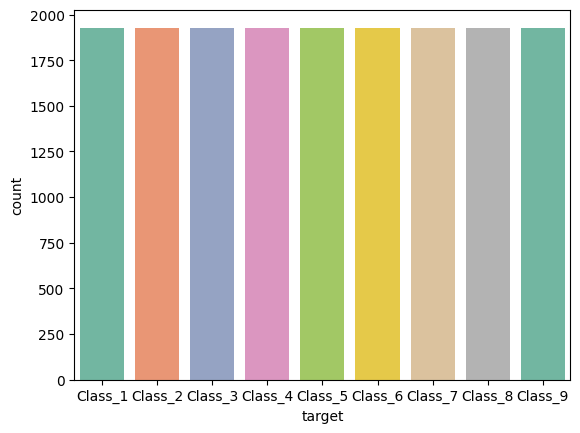

In [81]:
# 再来查看 随机欠采样 之后的数据分布
sns.countplot(x=y_resampled, palette="Set2")

plt.show()

In [82]:
# 再把标签转化为 数字
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# fit_transform() 是一个同时进行训练和转换的操作。
# fit() 负责让 LabelEncoder 学习 y_resampled 中类别标签的映射规则（即不同类别标签被编码成的数字），
# 而 transform() 则执行标签到数字的转换。
y_resampled = le.fit_transform(y_resampled)

y_resampled

array([0, 0, 0, ..., 8, 8, 8])

### 分割数据

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 22)

x_train.shape, y_train.shape

((13888, 93), (13888,))

### 模型训练

In [84]:
# 基本模型的训练
from sklearn.ensemble import RandomForestClassifier

'''
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
'''

# 启用袋外（Out-Of-Bag, OOB）估计
rf = RandomForestClassifier(oob_score = True)
# 进行模型的训练
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

In [85]:
y_pre = rf.predict(x_test)
y_pre

array([5, 7, 6, ..., 1, 2, 2])

In [86]:
rf.score(x_test,y_test)

0.791534696228045

In [87]:
# 查看袋外（Out-Of-Bag, OOB）数据的评分
rf.oob_score_

0.7598646313364056

C:\Users\ZSJ\AppData\Local\Temp\ipykernel_26496\3691886078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pre, palette='Set2')


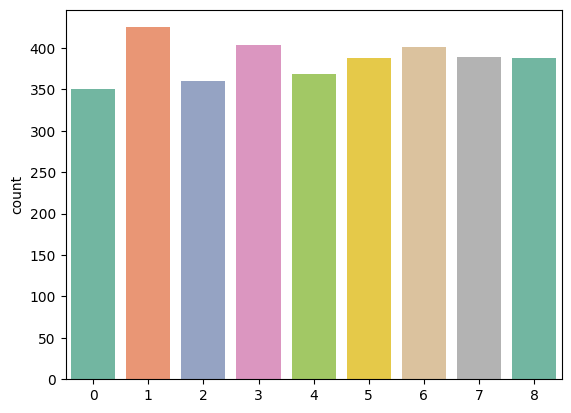

In [88]:
# 利用 图形可视化 ，查看预测值的图像分布

sns.countplot(x=y_pre, palette='Set2')

plt.show()

In [119]:
# 利用logloss模型进行评估
# log_loss 是一种评估分类模型性能的损失函数，尤其适用于概率输出的分类任务。
# 它通过对预测概率和实际标签的偏差进行评估，越接近实际类别的概率得分会得到更低的损失值，反之损失值会更高。

from sklearn.metrics import log_loss


# normalize=True: 当设置为 True 时，损失值会进行归一化，即损失值是所有样本的平均损失。如果为 False，则返回损失值的总和。
log_loss(y_test, y_pre, normalize=True)

0.8850310985020444

In [27]:
y_test, y_pre

(array([5, 7, 2, ..., 2, 2, 3]), array([5, 7, 2, ..., 1, 3, 2]))

上面报错原因:logloss使用过程中,必须要求将输出用one-hot表示,

***(这里可能也不会有错误，个人感觉这部分解释有些问题)***



需要将这个多类别问题的输出结果通过OneHotEncoder修改为如下:

In [29]:
y_test.reshape(-1,1)
y_pre.reshape(-1,1)

array([[5],
       [7],
       [2],
       ...,
       [1],
       [3],
       [2]])

In [59]:
from sklearn.preprocessing import OneHotEncoder

# sparse_output 参数用于控制输出是否为稀疏矩阵（True 表示稀疏矩阵，False 表示密集矩阵）。
one_hot = OneHotEncoder(sparse_output=False)

y_test1 = one_hot.fit_transform(y_test.reshape(-1,1))
y_pre1 = one_hot.fit_transform(y_pre.reshape(-1,1))

y_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# 利用one-hot编码进行处理之后，再利用 log_loss 进行模型评估
log_loss(y_test1, y_pre1, normalize=True)

7.441203420672904

In [57]:
# 改变预测值的输出模式，让输出结果为百分比， 降低logloss的值
y_pre_proba = rf.predict_proba(x_test)

y_pre_proba

array([[0.03, 0.01, 0.02, ..., 0.04, 0.01, 0.01],
       [0.07, 0.  , 0.  , ..., 0.  , 0.87, 0.05],
       [0.14, 0.14, 0.18, ..., 0.21, 0.12, 0.1 ],
       ...,
       [0.  , 0.65, 0.25, ..., 0.  , 0.  , 0.  ],
       [0.01, 0.32, 0.32, ..., 0.06, 0.02, 0.04],
       [0.  , 0.08, 0.52, ..., 0.01, 0.01, 0.  ]])

In [58]:
# logloss模型评估

log_loss(y_test1, y_pre_proba, normalize=True)

0.7363258742415169

### 模型调优

n_estimators, max_feature, max_depth, min_samples_leaf

找到这四个参数的最优值

1. 确定最优的 n_estimators (决策树数量)

In [90]:
# 确定 n_estimators 的取值范围
tuned_parameters = range(10,200,10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程的实现
for j, one_parameter in enumerate(tuned_parameters):
    print(f"Testing n_estimators: {one_parameter}")
    rf2 = RandomForestClassifier(n_estimators=one_parameter,
                                 max_depth=10,
                                 max_features=10,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)
    
    rf2.fit(x_train,y_train)

    # 输出 accuracy 
    accuracy_t[j] = rf2.oob_score_
    print(f"OOB Score: {accuracy_t[j]}")

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test,y_pre,normalize=True)

    print(f"Log Loss: {error_t[j]}")

    print(error_t)

Testing n_estimators: 10
OOB Score: 0.5897177419354839
Log Loss: 1.1295495546964662
[1.12954955 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Testing n_estimators: 20


d:\Study\Python\Anaconda\envs\transformer\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
d:\Study\Python\Anaconda\envs\transformer\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


OOB Score: 0.6412730414746544
Log Loss: 1.11749139512565
[1.12954955 1.1174914  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Testing n_estimators: 30
OOB Score: 0.6555299539170507
Log Loss: 1.1234900377869896
[1.12954955 1.1174914  1.12349004 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Testing n_estimators: 40
OOB Score: 0.6699308755760369
Log Loss: 1.1193922248636234
[1.12954955 1.1174914  1.12349004 1.11939222 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Testing n_estimators: 50
OOB Score: 0.6774913594470046
Log Loss: 1.1157271916377165
[1.12954955 1.1174914  1.12349004 1.11939222 1.11572719 0.
 0.         0.         0.         0.         0.         0.
 0.

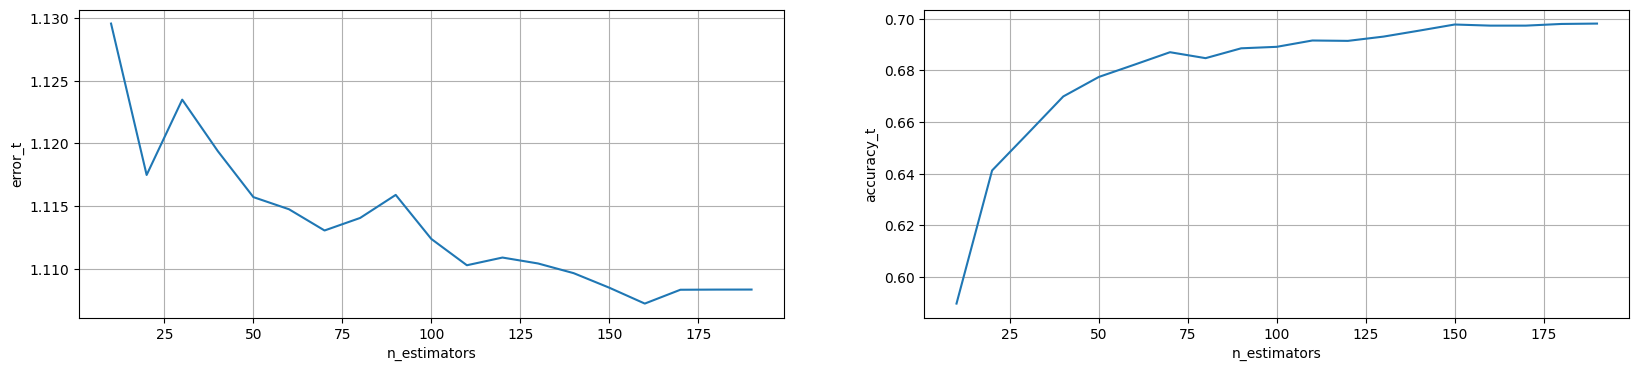

In [91]:
# 优化结果过程的可视化

# 创建一个包含多个子图，这里创建了一个画布上包含一行两列的子图，fig是整个图像的对象，axes是对应某个子图的对象
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4), dpi=100)

axes[0].plot(tuned_parameters,error_t)
axes[1].plot(tuned_parameters,accuracy_t)

axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()


对比图像后，确定n_estimators = 175 的时候，表现效果不错

2. 确定最优的 max_features

In [92]:
'''
    与之前很类似
'''


# 确定 max_features 的取值范围
tuned_parameters = range(5,40,5)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程的实现
for j, one_parameter in enumerate(tuned_parameters):
    print(f"Testing max_features: {one_parameter}")
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=10,
                                 max_features=one_parameter,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)
    
    rf2.fit(x_train,y_train)

    # 输出 accuracy 
    accuracy_t[j] = rf2.oob_score_
    print(f"OOB Score: {accuracy_t[j]}")

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test,y_pre,normalize=True)

    print(f"Log Loss: {error_t[j]}")

    print(error_t)

Testing max_features: 5
OOB Score: 0.689660138248848
Log Loss: 1.2079165346024756
[1.20791653 0.         0.         0.         0.         0.
 0.        ]
Testing max_features: 10
OOB Score: 0.6971486175115207
Log Loss: 1.1087025768437146
[1.20791653 1.10870258 0.         0.         0.         0.
 0.        ]
Testing max_features: 15
OOB Score: 0.6965005760368663
Log Loss: 1.0725679106978037
[1.20791653 1.10870258 1.07256791 0.         0.         0.
 0.        ]
Testing max_features: 20
OOB Score: 0.6894441244239631
Log Loss: 1.0569191633037476
[1.20791653 1.10870258 1.07256791 1.05691916 0.         0.
 0.        ]
Testing max_features: 25
OOB Score: 0.6785714285714286
Log Loss: 1.0515269625202306
[1.20791653 1.10870258 1.07256791 1.05691916 1.05152696 0.
 0.        ]
Testing max_features: 30
OOB Score: 0.6718029953917051
Log Loss: 1.0511677757998523
[1.20791653 1.10870258 1.07256791 1.05691916 1.05152696 1.05116778
 0.        ]
Testing max_features: 35
OOB Score: 0.664602534562212
Log 

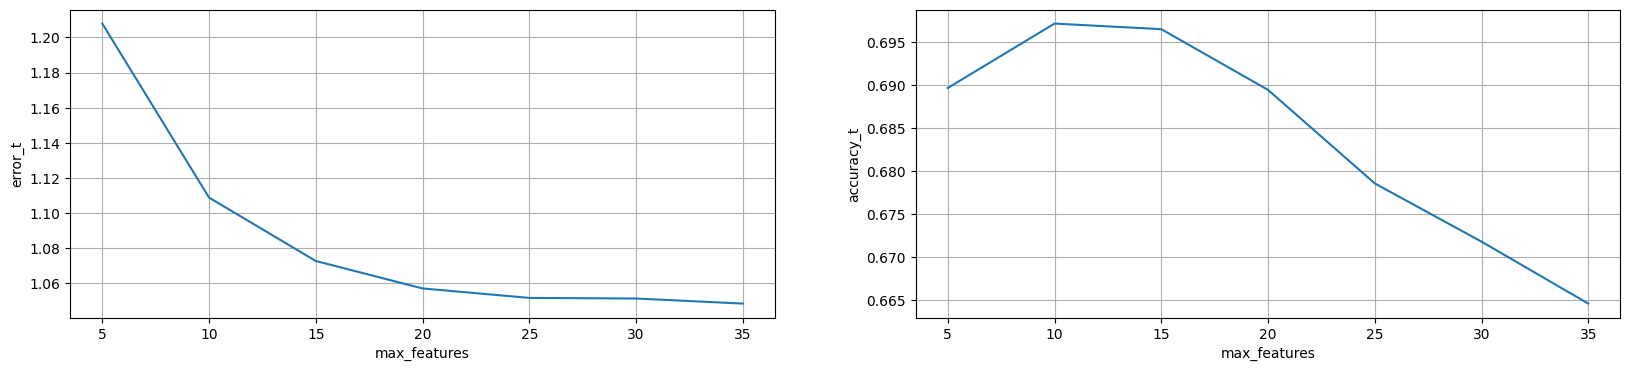

In [93]:
# 优化结果过程的可视化

# 创建一个包含多个子图，这里创建了一个画布上包含一行两列的子图，fig是整个图像的对象，axes是对应某个子图的对象
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4), dpi=100)

axes[0].plot(tuned_parameters,error_t)
axes[1].plot(tuned_parameters,accuracy_t)

axes[0].set_xlabel("max_features")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_features")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()


经过对比两个图像，最后确定max_features=15的时候，模型表现效果较好

3. 确定最优的max_depth

In [94]:
'''
    与之前很类似
'''


# 确定 max_depth 的取值范围
tuned_parameters = range(10,100,10)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程的实现
for j, one_parameter in enumerate(tuned_parameters):
    print(f"Testing max_depth: {one_parameter}")
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=one_parameter,
                                 max_features=15,
                                 min_samples_leaf=10,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)
    
    rf2.fit(x_train,y_train)

    # 输出 accuracy 
    accuracy_t[j] = rf2.oob_score_
    print(f"OOB Score: {accuracy_t[j]}")

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test,y_pre,normalize=True)

    print(f"Log Loss: {error_t[j]}")

    print(error_t)

Testing max_depth: 10
OOB Score: 0.6965005760368663
Log Loss: 1.0725679106978037
[1.07256791 0.         0.         0.         0.         0.
 0.         0.         0.        ]
Testing max_depth: 20
OOB Score: 0.7418634792626728
Log Loss: 0.8432732223538607
[1.07256791 0.84327322 0.         0.         0.         0.
 0.         0.         0.        ]
Testing max_depth: 30
OOB Score: 0.741647465437788
Log Loss: 0.8221548156684003
[1.07256791 0.84327322 0.82215482 0.         0.         0.
 0.         0.         0.        ]
Testing max_depth: 40
OOB Score: 0.7401353686635944
Log Loss: 0.8213095147001541
[1.07256791 0.84327322 0.82215482 0.82130951 0.         0.
 0.         0.         0.        ]
Testing max_depth: 50
OOB Score: 0.7402073732718893
Log Loss: 0.8213424084829788
[1.07256791 0.84327322 0.82215482 0.82130951 0.82134241 0.
 0.         0.         0.        ]
Testing max_depth: 60
OOB Score: 0.7402073732718893
Log Loss: 0.8213424084829788
[1.07256791 0.84327322 0.82215482 0.82130951 

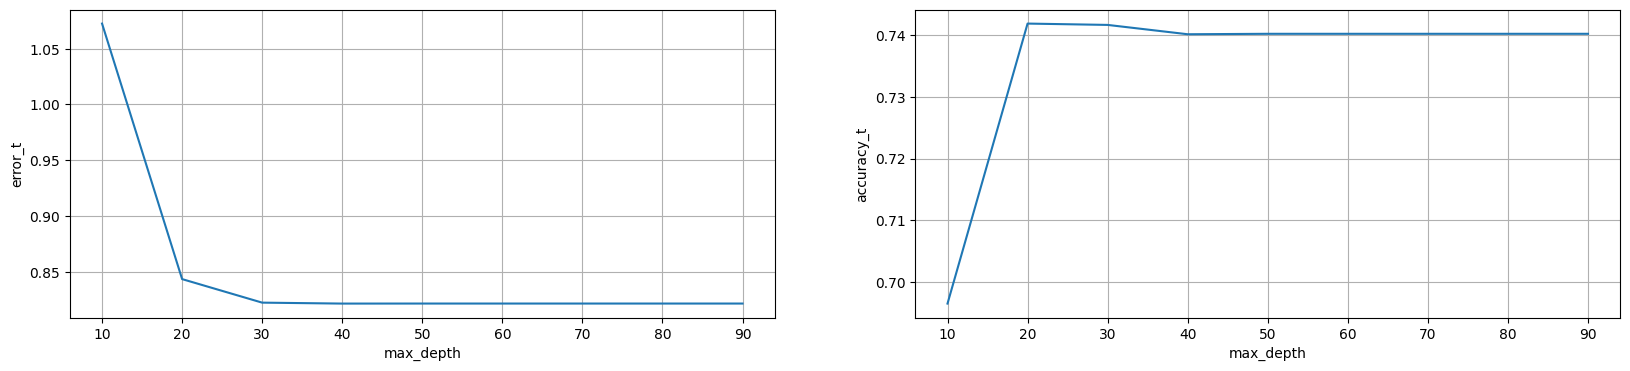

In [95]:
# 优化结果过程的可视化

# 创建一个包含多个子图，这里创建了一个画布上包含一行两列的子图，fig是整个图像的对象，axes是对应某个子图的对象
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4), dpi=100)

axes[0].plot(tuned_parameters,error_t)
axes[1].plot(tuned_parameters,accuracy_t)

axes[0].set_xlabel("max_depth")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()


经过对比两个图像，最后确定max_depth=30的时候，模型表现效果较好

4. 确定最优的min_sample_leaf

In [102]:
'''
    与之前很类似
'''


# 确定 min_sample_leaf 的取值范围
tuned_parameters = range(1,20,2)

# 创建添加accuracy的一个numpy
accuracy_t = np.zeros(len(tuned_parameters))

# 创建添加error的一个numpy
error_t = np.zeros(len(tuned_parameters))

# 调优过程的实现
for j, one_parameter in enumerate(tuned_parameters):
    print(f"Testing max_depth: {one_parameter}")
    rf2 = RandomForestClassifier(n_estimators=175,
                                 max_depth=30,
                                 max_features=15,
                                 min_samples_leaf=one_parameter,
                                 oob_score=True,
                                 random_state=0,
                                 n_jobs=-1)
    
    rf2.fit(x_train,y_train)

    # 输出 accuracy 
    accuracy_t[j] = rf2.oob_score_
    print(f"OOB Score: {accuracy_t[j]}")

    # 输出log_loss
    y_pre = rf2.predict_proba(x_test)
    error_t[j] = log_loss(y_test,y_pre,normalize=True)

    print(f"Log Loss: {error_t[j]}")

    print(error_t)

Testing max_depth: 1
OOB Score: 0.768721198156682
Log Loss: 0.7004267056142242
[0.70042671 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Testing max_depth: 3
OOB Score: 0.7636808755760369
Log Loss: 0.7361133928553524
[0.70042671 0.73611339 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Testing max_depth: 5
OOB Score: 0.7546802995391705
Log Loss: 0.7680415433476985
[0.70042671 0.73611339 0.76804154 0.         0.         0.
 0.         0.         0.         0.        ]
Testing max_depth: 7
OOB Score: 0.7501440092165899
Log Loss: 0.7924891919056148
[0.70042671 0.73611339 0.76804154 0.79248919 0.         0.
 0.         0.         0.         0.        ]
Testing max_depth: 9
OOB Score: 0.7444556451612904
Log Loss: 0.81559798734167
[0.70042671 0.73611339 0.76804154 0.79248919 0.81559799 0.
 0.         0.         0.         0.        ]
Testing max_depth: 11
OOB Score: 0.739559331797235
Log Loss: 0.831289395687086

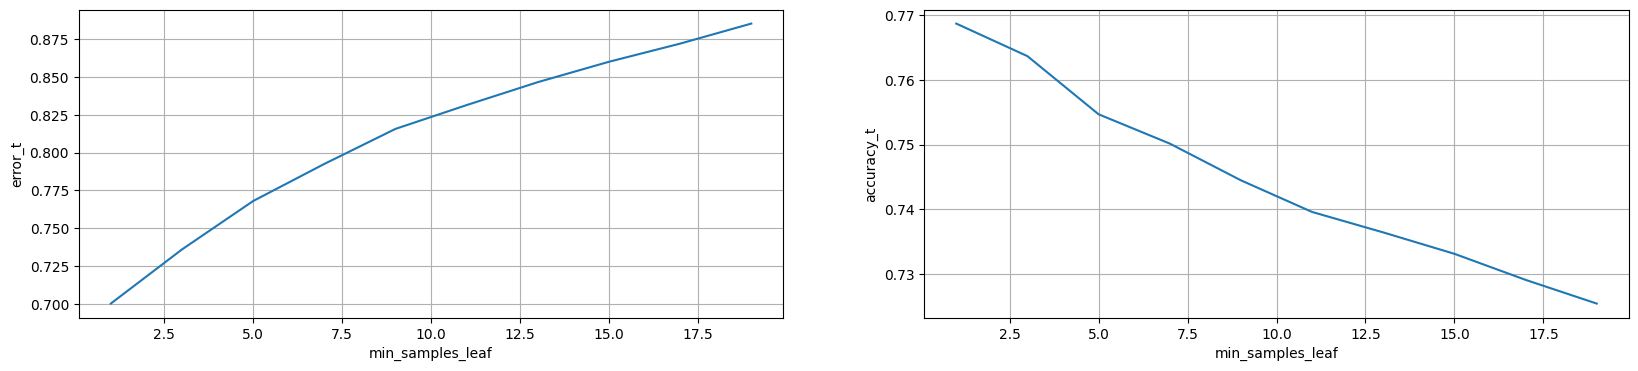

In [103]:
# 优化结果过程的可视化

# 创建一个包含多个子图，这里创建了一个画布上包含一行两列的子图，fig是整个图像的对象，axes是对应某个子图的对象
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4), dpi=100)

axes[0].plot(tuned_parameters,error_t)
axes[1].plot(tuned_parameters,accuracy_t)

axes[0].set_xlabel("min_samples_leaf")
axes[0].set_ylabel("error_t")
axes[1].set_xlabel("min_samples_leaf")
axes[1].set_ylabel("accuracy_t")

axes[0].grid(True)
axes[1].grid(True)

plt.show()


经过对比两个图像，最后确定min_samples_leaf=1的时候，模型表现效果较好

### 最后确定了最优的模型参数
n_estimators = 175,
max_depth = 30,
max_features = 15,
min_samples_leaf = 1,

In [109]:
rf3 = RandomForestClassifier(n_estimators=175,
                             max_depth=30,
                             max_features=15,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=74,
                             n_jobs=-1)

rf3.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, max_features=15, n_estimators=175,
                       n_jobs=-1, oob_score=True, random_state=74)

In [110]:
rf3.score(x_test,y_test)

0.79095882522315

In [111]:
rf3.oob_score_

0.7644729262672811

In [112]:
y_pre_proba1 = rf3.predict_proba(x_test)

log_loss(y_test,y_pre_proba1)

0.6984535247889856

### 生成kaggle提交数据

In [113]:
test_data = pd.read_csv("./data/otto/test.csv")

test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [114]:
test_data_drop_id = test_data.drop(["id"], axis=1)
test_data_drop_id.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [115]:
y_pre_test = rf3.predict_proba(test_data_drop_id)

y_pre_test

array([[2.85714286e-02, 7.49028749e-02, 7.79220779e-02, ...,
        2.28571429e-02, 0.00000000e+00, 1.14285714e-02],
       [8.00000000e-02, 5.85714286e-02, 3.71428571e-02, ...,
        4.00000000e-02, 2.57142857e-01, 5.71428571e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.71428571e-03],
       ...,
       [1.71428571e-02, 2.67916667e-01, 3.94366883e-01, ...,
        2.87012987e-02, 0.00000000e+00, 0.00000000e+00],
       [1.14285714e-02, 2.37923077e-01, 1.10481256e-01, ...,
        1.74829932e-02, 0.00000000e+00, 5.71428571e-03],
       [1.18562382e-03, 1.88184262e-01, 3.88965370e-01, ...,
        1.74727858e-01, 3.11253093e-04, 1.66865489e-03]])

In [116]:
result_data = pd.DataFrame(y_pre_test,columns=["Class_"+str(i) for i in range(1,10)])

result_data.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.028571,0.074903,0.077922,0.755227,0.011429,0.017662,0.022857,0.000000,0.011429
1,0.080000,0.058571,0.037143,0.058571,0.017143,0.445714,0.040000,0.257143,0.005714
2,0.000000,0.000000,0.000000,0.005714,0.000000,0.988571,0.000000,0.000000,0.005714
3,0.017484,0.305494,0.234082,0.270411,0.005714,0.000256,0.012103,0.005800,0.148657
4,0.178899,0.000298,0.000330,0.000419,0.000189,0.011884,0.018219,0.172561,0.617199


In [117]:
result_data.insert(loc=0, column="id", value=test_data.id)

result_data.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.028571,0.074903,0.077922,0.755227,0.011429,0.017662,0.022857,0.000000,0.011429
1,2,0.080000,0.058571,0.037143,0.058571,0.017143,0.445714,0.040000,0.257143,0.005714
2,3,0.000000,0.000000,0.000000,0.005714,0.000000,0.988571,0.000000,0.000000,0.005714
3,4,0.017484,0.305494,0.234082,0.270411,0.005714,0.000256,0.012103,0.005800,0.148657
4,5,0.178899,0.000298,0.000330,0.000419,0.000189,0.011884,0.018219,0.172561,0.617199


In [118]:
result_data.to_csv("./data/otto/submission.csv",index=False)